# CreateBathymetryFromEarthRecon

This jupyter-notebook is used to show how ExoCcycle classes, functions, and methods are used to generate reconstructed bathymetry models (as shown) and carbon cycle model parameters. Note that ocean basins must be define for the ocean basin volume correction to be applied.

### Difference between present-day model and Etopo (1 degree resolution)
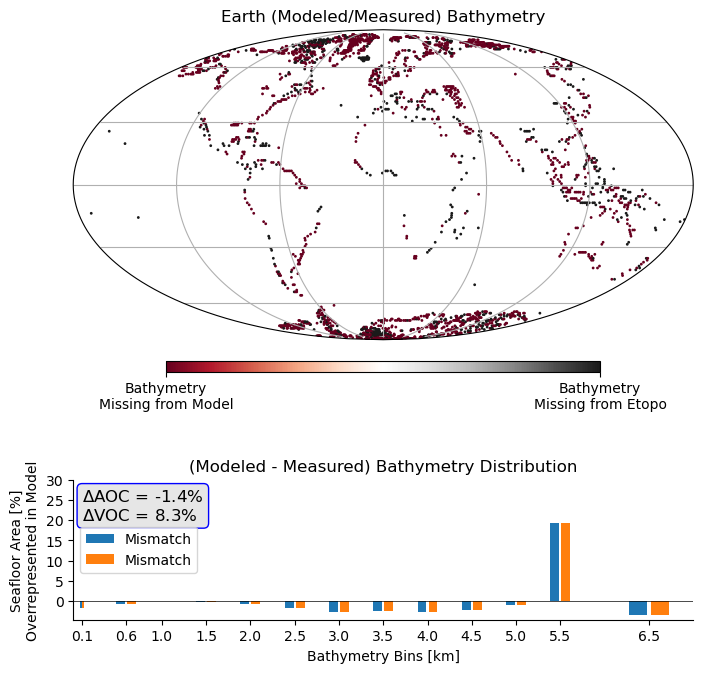


### Reconstructed bathymetry (Present-day) - basin definitions
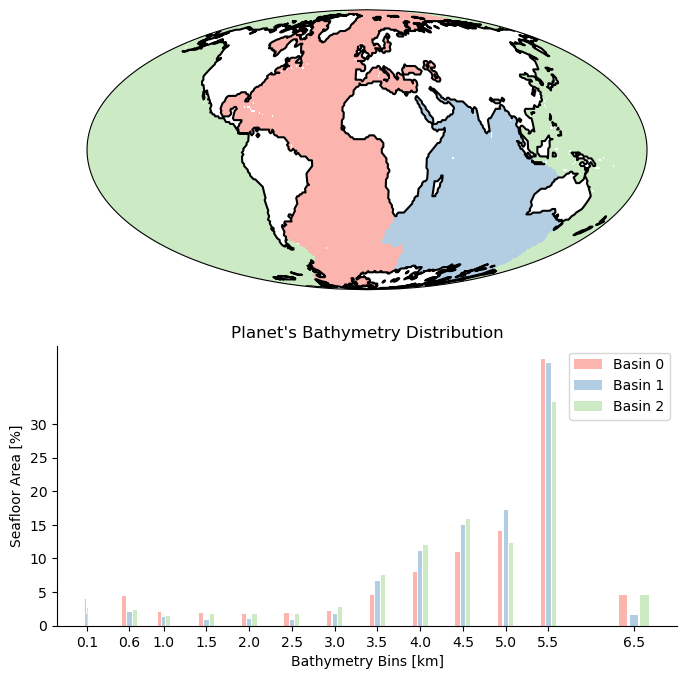

### Reconstructed bathymetry (Present-day) - VOC correction
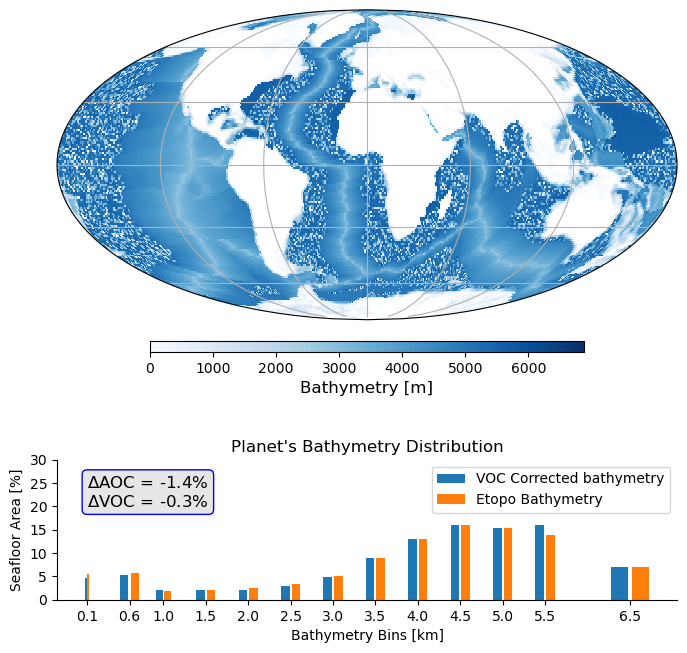

Negative delta AOC and VOC means that the predicted ocean contains less AOC and VOC than the etopo model. 

### Reconstructed bathymetry (30 Ma) - basin definitions


### Reconstructed bathymetry (30 Ma) - bathymetry and Ccycle Parms



In [2]:
# Import necessary libraries
import ExoCcycle as EC
import matplotlib as mpl
import numpy as np
import os

# Define an input directory dictionary containing all necessary
# directories for the bathymetry reconstruction and analysis.
directories = {"paleoDEMs":"/home/bogumil/Documents/data/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2",
               "oceanLith":"/home/bogumil/Documents/data/Muller_etal_2019_Tectonics_v2.0_netCDF",
               "etopo":"//home/bogumil/Documents/data/topo"};
## Notes on name convection of paleoDEMs and oceanLith files.
## paleoDEMs -> [prefix]_[float/int]Ma.nc
## oceanLith -> [prefix]-[float/int].nc


# Create bathymetry object for reconstructing past Earth bathymetry 
EarthReconBathy = EC.Bathymetry.BathyRecon(directories)


# Reconstruction past Earth bathymetry from 0 to 80 Ma in 5 myr increments
# and with a resolution of 1 degree.
#EarthReconBathy.run(startMa=80, endMa=0, deltaMyr=5, resolution=1)
testAgest = 80
#testAgest = 0
testAgeend = 0; # Needs to be smaller or equal to age testAgest.
#testAgeend = testAgest
EarthReconBathy.run(startMa=testAgest,
                    endMa=testAgeend,
                    deltaMyr=5,
                    resolution=1,
                    findBasins=False)



# Components at work in the above code.
#
# 1. Reading in ocean lithospheric age models
# EarthReconBathy.getOceanLithosphereAgeGrid(80, 1, fuzzyAge=True)
# EarthReconBathy.oceanLithAge['lon'][:]
# EarthReconBathy.oceanLithAge['lat'][:]
# EarthReconBathy.oceanLithAge['z'][:]
#
# 2. Adding thermal subsidence defined bathymetry
# EarthReconBathy.addThermalSub(topography, seafloorAge, latitude)
#
# 3. Add isostatic correction for ocean lithosphere and overlaying sediment
# EarthReconBathy.getIsostaticCorrection()
#     EarthReconBathy.getsed() # Adds seafloor sediment layer
#
# 4. Reading/Applying in paleoDEMs; Area not represented by seafloor age
# reconstructions is replaced with paleoDEM bathymetry. fuzzyAge allows
# for reconstructions within 1 Ma to be used for the reconstruction. This
# is required for a single Scotese and Wright paleoDEM (385.2 Ma).
# EarthReconBathy.getDEM(0, 1, fuzzyAge=True)
# EarthReconBathy.paleoDEM['lon'][:]
# EarthReconBathy.paleoDEM['lat'][:]
# EarthReconBathy.paleoDEM['z'][:]
#  
# 5. Reading/Applying eustatic sealevel
# EarthReconBathy.getESL(topo, age)
#
# 6. addVOCCorrection()
#
# 7. EarthReconBathy.run()
# 
#     Saving Ccycle bathymetry parameters
#         Note that if the ocean basin volume correction is applied
#         then basin connectivity parameters calculated with
#         Bains.calculateBasinConnectivityParameter(...) will be calculated
#         with the original (non-VOC corrected) bathymetry. Therefore there
#         will be some inconsistencies between basin connectivity parameters
#         and bathymetry distributions.
#     


/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ocean basin volume is constant through reconstruction period.


'\nEarthReconBathy.run(startMa=testAgest,\n                    endMa=testAgeend,\n                    deltaMyr=5,\n                    resolution=1,\n                    findBasins=True)\n                    '

## Cell creates video from reconstruction (it is formatted for a YouTube short dimension)

In [5]:
import ExoCcycle as EC
import numpy as np
import os

testAgest  = 80;
testAgeend = 0; # Needs to be smaller or equal to age testAgest.
deltaMyr   = 5;
ages = np.arange(testAgeend, testAgest+deltaMyr, deltaMyr)

# Create directory to hold images files
EC.utils.create_file_structure(['/temp'])


# Copy over images
for i in range(len(ages)):
    agei = ages[i]
    framei = i
    # 
    #print(("cp bathymetries/EarthRecon3Basins/EarthRecon3Basins_1deg_{0:0.0f}Ma.png temp/{1}.png".format(ages[i], "{:0.0f}".format(framei).zfill(3) )))
    os.system("cp bathymetries/EarthRecon3Basins/EarthRecon3Basins_1deg_{:0.0f}Ma.png temp/{}.png".format(ages[i], "{:0.0f}".format(framei).zfill(3) ))
    
# 
os.system("ffmpeg -f image2 -framerate 2 -i temp/%03d.png -vcodec libx264 -crf 22 video.mp4 -hide_banner -loglevel error -y");

backgroundColor = 'white'
aspectRatio = [9, 16]
operation = """ffmpeg -i video.mp4 -filter_complex "[0]pad=w=iw:h=iw*{0}/{1}:x=iw:y=iw*{0}/{1}/2:color={2}" output2.mp4 -hide_banner -loglevel error -y""".format(aspectRatio[1], aspectRatio[0], backgroundColor)
os.system(operation);




The following folder(s) exists within current directory:
/temp


In [3]:


# To FIX/Change
#
# Get sea-level curve from https://www.science.org/doi/10.1126/science.1161648
# Then apply 70-60% (https://www.earthbyte.org/webdav/ftp/Data_Collections/Scotese_Wright_2018_PaleoDEM/Scotese_Wright2018_PALEOMAP_PaleoDEMs.pdf)
# of the curve (i.e., factor=.6-.7) of that curve to the seafloor depth predicted
# outside of paleoDEM areas.
# 
# Check that bathymetry reconstructions at 0, 40, and 80 Ma have resonable flooding
#
# Redfine basins groups from 0 to 80 Ma
#
# Group basins at 0, 5, and 10 Ma
#
# Finish framework to save bathymetry parameters (similar to that done for the bodies class)
#
















print("{0:0.2e} m3".format(2737421831274891.5) )
print("{0:0.2e} m3".format((3500*510.1e12)) )
sxbin_p = EarthReconBathy.bathymetryAreaDistMismatchGNorm


for j in range(len(EarthReconBathy.binEdges[1:])):

    ## Find the amount of ocean volume to be transfer between bin j (bins with
    ## excess ocean volume/area) and other bins (bins lacking ocean area representation).
    if sxbin_p[j] > 0:

        ## Ocean volume to be removed through adding shallower depths than the current bin.
        sxbin_p_rm = sxbin_p[0:j];
        bini_redis_faction1 = 100*( sxbin_p_rm/np.sum( sxbin_p_rm[sxbin_p_rm<0] ) )/\
            (np.abs(np.sum( sxbin_p_rm[sxbin_p_rm<0])/sxbin_p[j]));
        ## Ocean volume to be added through adding deeper depths than the current bin.
        sxbin_p_add = sxbin_p[j+1:];
        bini_redis_faction2 = 100*( sxbin_p_add/np.sum( sxbin_p_add[sxbin_p_add<0] ) )/\
            (np.abs(np.sum( sxbin_p_add[sxbin_p_add<0])/sxbin_p[j]));
        ## Ocean volume to be removed/added through adding shallower/deeper bins than the current bin
        bini_redis_faction = np.append(np.append(bini_redis_faction1,np.array(0.0)),bini_redis_faction2);

        # bini_redis_faction % of bathymetry at depths EarthReconBathy.binEdges[j] should be
        # moved to EarthReconBathy.binEdges[i]
        print("bini_redis_faction", bini_redis_faction)
        
print("sxbin_p",sxbin_p)


EarthReconBathy.bathymetryAreaDistMismatchGNorm

np.sum(EarthReconBathy.bathymetryAreaDistMismatchGNorm[EarthReconBathy.bathymetryAreaDistMismatchGNorm>0])
np.sum(EarthReconBathy.bathymetryAreaDistMismatchGNorm[EarthReconBathy.bathymetryAreaDistMismatchGNorm<0])

EarthReconBathy.sxbin_p[0]



2.74e+15 m3
1.79e+18 m3
bini_redis_faction [ 3.13202426  1.18716624  0.          0.00922372  0.02610562  0.06403382
  0.10139442  0.09286497  0.09911562  0.07953068  0.03891729 -0.73518807
  0.13227989]
bini_redis_faction [ 13.86829501   5.25665522  -0.82604303   1.84016817   5.20817333
  12.77499888  20.22858366  18.52692545  19.77395395  15.86668263
   7.76415188   0.         555.78219701]
sxbin_p [-1.82320781 -0.69107088  0.10859649 -0.24191935 -0.68469717 -1.67947666
 -2.65936885 -2.43565883 -2.59960055 -2.08592763 -1.02072117 19.28248423
 -3.46943179]


-1.823207813887566

100.00000000000001
100.0


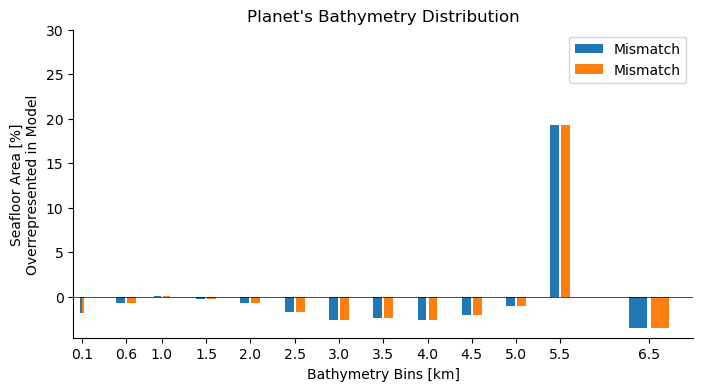

In [3]:
import matplotlib.pyplot as plt

print(np.sum(EarthReconBathy.bathymetryAreaDistEtopo))
print(np.sum(EarthReconBathy.bathymetryAreaDist))

def plotfnc(bathymetryAreaDist, bathymetryAreaDistEtopo, binEdges):
    fig = plt.figure(figsize=(8,4))

    factor1 = .2
    factor2 = .25
    plt.bar(x=binEdges[1:]-(factor2/2)*np.diff(binEdges),
            height=bathymetryAreaDistEtopo,
            width=factor1*np.diff(binEdges),
            label= "Mismatch")
    plt.bar(x=binEdges[1:]+(factor2/2)*np.diff(binEdges),
            height=bathymetryAreaDist,
            width=factor1*np.diff(binEdges),
            label= "Mismatch")
    
    plt.plot([-1, 8], [0, 0], 'k', linewidth=.5)
    # ticks
    plt.xticks(binEdges[1:]);
    plt.yticks(np.arange(0,35,5));

    # Labels
    plt.legend();
    plt.title("Planet's Bathymetry Distribution")
    plt.xlabel("Bathymetry Bins [km]");
    plt.ylabel("Seafloor Area [%]\nOverrepresented in Model");

    # figure format
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlim([0,7])
    

plotfnc(EarthReconBathy.bathymetryAreaDistMismatch,
        EarthReconBathy.bathymetryAreaDistMismatch,
        EarthReconBathy.binEdges)

In [2]:
'''
# Download topography model (note that is must only be done once per body).
# NOTE: UNCOMMENT THIS SECTION TO DOWNLOAD TOPOGRAPHY MODEL
# marsBathy.getTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",
#                   verbose=False);

# Read topography. This method will generate a topography model netCDF4 file with 
# new_resolution, in degrees. Note that the generated topography model will be 
# cell registered (All calculations from here on out are in cell registered to
# simplify codes and reduce data loss on conversions).
marsBathy.readTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",
                   new_resolution=1,
                   verbose=False);

# Generate a bathymetry model base on a set of input methods and properties. The setSeaLelvel
# method has multiple ways to fill topography with oceans. The two currently implemented at
# the time of this JN creation are as follows:
#     1) basinVolume : An option to define bathymetry by flooding topography with
#                      basinVolume['uncompactedVol'] amount of ocean water, in m3.
#     2) OceanArea : Option to define bathymetry by flooding topography until
#                    oceanArea['area'], decimal percent, of global area is covered
#                    with oceans.
# 
# Here, I use the OceanArea constraint and block the basinVolume constraint with comments.
# 
marsBathy.setSeaLevel(basinVolume = {"on":False, 'uncompactedVol':None},
                      oceanArea = {"on":True, "area":0.7},
                      isostaticCompensation = {"on":False}, verbose=False)

# Note that in this basinVolume example the uncompactedVol was set to the oceanArea
# bathymetry model's VOC, where oceanArea = {"on":True, "area":0.7}. 
#
# marsBathy.setSeaLevel(basinVolume = {"on":True, 'uncompactedVol':3.299187952154623e+17},
#                       oceanArea = {"on":False, "area":0.7},
#                       isostaticCompensation = {"on":False}, verbose=False)


# Save bathymetry model as netCDF4. Note that models will be saved under the same root folder
# that was supplied to the readTopo(...) method.
# 
# only the bathymetry array is saved in this file. Other relevant values are represented
# as vectors (e.g., lat, lon, area-weights, global bathymetery distributions, etc) or
# attributes (e.g., VOC, AOC, high latitude cutoff, etc).
# 
marsBathy.saveBathymetry()

#
# To see a full set of stored netCDF4 values, the user can uncomment the code below
# 
# marsBathy.readBathymetry()
# print(marsBathy.bathync)
# print(marsBathy.bathync.variables)

# Plot bathymetry model
blues_cm = mpl.colormaps['Blues'].resampled(100)
EC.utils.plotGlobal(marsBathy.lat, marsBathy.lon, marsBathy.bathymetry,
                    outputDir = marsBathy.data_dir+"/bathymetries/{}".format(marsBathy.model),
                    fidName = "{}-setSeaLevel_Area0p7.png".format(marsBathy.model),
                    cmapOpts={"cmap":blues_cm,
                              "cbar-title":"cbar-title",
                              "cbar-range":[np.nanmin(np.nanmin(marsBathy.bathymetry)),
                                            np.nanmean(marsBathy.bathymetry)+2*np.nanstd(marsBathy.bathymetry)]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"{}".format(marsBathy.model),
                             "plotZeroContour":True},
                    savePNG = True)


# Plot bathymetry model w/ bathymetry histograms
EC.utils.plotGlobalwHist(marsBathy.lat, marsBathy.lon, marsBathy.bathymetry,
                        marsBathy.binEdges, marsBathy.bathymetryAreaDist_wHighlat, marsBathy.bathymetryAreaDist, marsBathy.highlatlat,
                        outputDir = marsBathy.data_dir+"/bathymetries/{}".format(marsBathy.model),
                        fidName = "{}-setSeaLevel_Area0p7.png".format(marsBathy.model),
                        cmapOpts={"cmap":blues_cm,
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[np.nanmin(np.nanmin(marsBathy.bathymetry)),
                                                np.nanmean(marsBathy.bathymetry)+2*np.nanstd(marsBathy.bathymetry)]},
                        pltOpts={"valueType": "Bathymetry",
                                 "valueUnits": "m",
                                 "plotTitle":"{}".format(marsBathy.model),
                                 "plotZeroContour":True},
                        savePNG = True)
'''


'\n# Download topography model (note that is must only be done once per body).\n# NOTE: UNCOMMENT THIS SECTION TO DOWNLOAD TOPOGRAPHY MODEL\n# marsBathy.getTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",\n#                   verbose=False);\n\n# Read topography. This method will generate a topography model netCDF4 file with \n# new_resolution, in degrees. Note that the generated topography model will be \n# cell registered (All calculations from here on out are in cell registered to\n# simplify codes and reduce data loss on conversions).\nmarsBathy.readTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",\n                   new_resolution=1,\n                   verbose=False);\n\n# Generate a bathymetry model base on a set of input methods and properties. The setSeaLelvel\n# method has multiple ways to fill topography with oceans. The two currently implemented at\n# the time of this JN creation are as follows:\n#     1) basinVolume : An option to define b